# Shark Attack Analysis

## Libraries

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import re
import numpy as np

_____________

## Context & hypotheses

I'm a consultant and i've been contacted by a water sports and expereriences company willing to implement a new scuba diving and shark sighting activity. They want me to study the safest conditions and locations according to the data, as well as any other relevant information I can provide them by studying the shark attacks dataset.

**Hypotheses**:
1. The most attacks occur in the australian coast and pacific north american coast.
2. Attacks have been deacreasing in the last decades given to improvement in safety measures.
3. Attacks tend to happen while the victims were surfing, swimming and generally during unsupervised activites.
4. Attacks are more common in summer, given that way more activities are conducted in the open sea. 


_____________

## The dataset

In [109]:
df = pd.read_csv('../Input/attacks.csv', encoding_errors='ignore')

### The original dataset

Brief explanation of dataset origin (extracted from Kaggle) + columns

In [110]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonMcNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset cleaning process

Few transformation & cleaning techniques applied

In [160]:
df = clean_df(df)

________________

## Data Analysis

h1 : The most attacks occur in the australian coast and pacific north american coast.

In [119]:
df_country = pd.DataFrame(df.Country.value_counts()[:20])

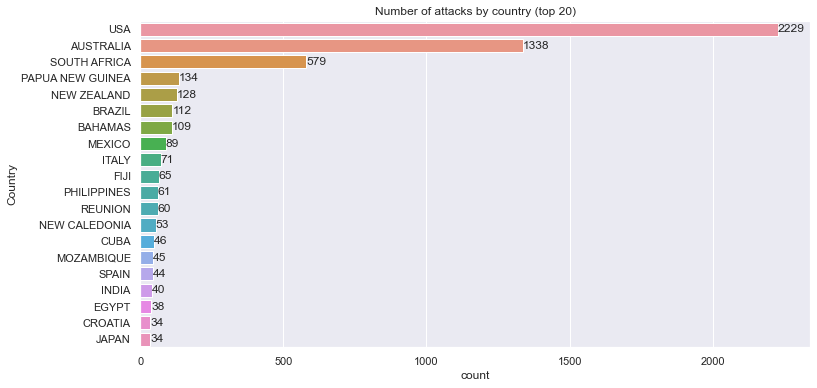

In [161]:
ax = sns.set(rc={"figure.figsize": (12.,6.)})
ax = sns.countplot(y='Country',data=df, order=df['Country'].value_counts(ascending=False).index[:20])
try: 
    ax.bar_label(container=ax.containers[0], labels=df['Country'].value_counts(ascending=False).values)
except AttributeError:
    pass
ax = ax.set_title(label='Number of attacks by country (top 20)')

In [191]:
df_year = pd.DataFrame(df['Year'].value_counts())

In [205]:
df_year = df_year[df_year.index>1900]

Text(0, 0.5, 'Count')

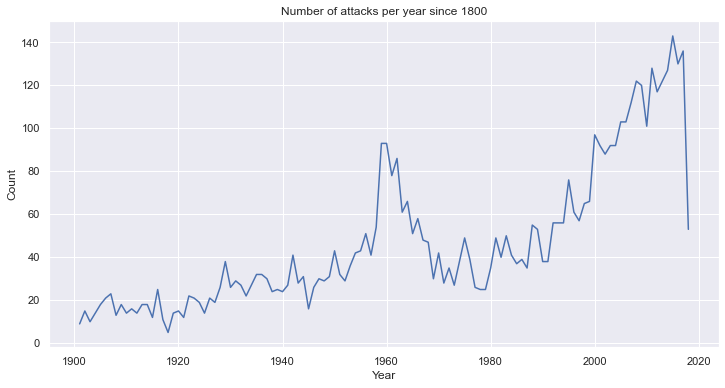

In [206]:
ax = sns.set(rc={"figure.figsize": (12.,6.)})
ax = sns.lineplot(data=df_year, x=df_year.index, y=df_year.Year)
ax.set_title(label='Number of attacks per year since 1800')
ax.set_xlabel('Year')
ax.set_ylabel('Count') 

In [112]:
def clean_df(df):
    '''
    This function takes a DataFrame as input and applies some cleaning techniques to return a clean DataFrame
    Arg: 1 df
    '''
    #Delete useless cols
    columns_to_delete = ["Case Number", "pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Unnamed: 22", "Unnamed: 23"]
    df = df.drop(columns_to_delete, axis=1)
    
    #Check rows filled with NaN's and delete them
    df = df[~df.isna().all(1)] 
    
    #Change all elements in 'Country' into uppercase
    df['Country'] = df['Country'].str.upper()
    
    #Matching a pattern in the date column to create a new month column
    df["Month"] = df.Date.apply(lambda x: "".join(re.findall(r"[A-Za-z]{3}-",x)).replace("-",""))
    
    #Strip the right space from the name of the column 'Sex' and its values
    df['Sex'] = df['Sex '].str.rstrip()
    df = df.drop("Sex ", axis=1)
    
    # looking for elements with two digits in 'Age'
    df['Age'] = df['Age'].dropna().apply(lambda x: re.findall(r"\d{2}",x))  
    df['Age'] = df['Age'].str[0] # Dropping extra values in Age (sometimes more than one in one row
    df['Age'] = df['Age'].astype(float) #Convert all values into floats so we can later operate with them
    
    # 'Fatal (Y/N)' strip spaces left and right and convert all into uppercase
    df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.rstrip().str.lstrip().str.upper()
    df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace({'M': 'UNKNOWN','2017':'UNKNOWN'}).fillna("UNKNOWN") #dealing with NaNs    
    
    return df

In [107]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'Month', 'Sex'],
      dtype='object')